In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
df=pd.read_excel("Superstore_USA.xlsx")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [79]:
data=df[df["Order ID"].duplicated()]

In [80]:
duplicated_dates=data[data["Order Date"].duplicated(keep=False)]

In [81]:
dup=duplicated_dates[duplicated_dates["Order ID"].duplicated(keep=False)]

In [82]:
dup[dup["Order ID"]==90504]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
9310,24529,Critical,0.08,39.48,1.99,3368,Marian Alexander,Express Air,Home Office,Technology,...,East,Ohio,Warren,44483,2012-01-11,2012-01-13,299.5842,11,434.18,90504
9311,24530,Critical,0.04,6.48,5.40,3368,Marian Alexander,Regular Air,Home Office,Office Supplies,...,East,Ohio,Warren,44483,2012-01-11,2012-01-13,-11.0236,1,11.87,90504


In [83]:
dup.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

### checking for repeatative products

In [84]:
dup[dup['Product Name']=='Executive Impressions 12" Wall Clock'][['Order ID','Product Name']]

,Order ID,Product Name
114,91579,"Executive Impressions 12"" Wall Clock"
2300,89546,"Executive Impressions 12"" Wall Clock"
5380,46565,"Executive Impressions 12"" Wall Clock"
5394,90572,"Executive Impressions 12"" Wall Clock"


In [85]:
dup[dup['Order ID']==46565][['Order ID','Product Name']]

,Order ID,Product Name
5380,46565,"Executive Impressions 12"" Wall Clock"
5381,46565,Space Solutions Commercial Steel Shelving


In [86]:
#freq bought together
#micro keyboard
#global tm
#space =2

In [87]:
order=dup["Order ID"].unique()

In [88]:
product=dup['Product Name'].unique()

In [89]:
# for i in product:
#     for j in order:
#         ds=dup[dup["Order ID"]==j]
#         temp=ds[ds["Product Name"]==i]
#         if len(temp)>0:
#             print(len(temp))
#             print("*********")

In [90]:
list=[]
for i in range(len(product)):
    list.append(np.nan)
final_df=pd.DataFrame([list])
final_df.columns=product

In [93]:
#product


In [35]:
dict={}
list1=[]
for i in product:
   
    print(i ,"PRODUCT")
    for j in order:
        ds=dup[dup["Order ID"]==j]
        temp=ds[ds["Product Name"]==i]
        if len(temp)>0:
           
            atp=ds[ds["Product Name"]!=i]
            if len(atp) >0:
                for k in atp["Product Name"]:
                    #print(k)
                    if k not in dict:
                        dict[k]=1
                    else:
                        dict[k]+=1
    
    list1.append(dict)
    print(dict)
    dict={}


Acme® Preferred Stainless Steel Scissors PRODUCT
{'V70': 1, 'Eldon® Executive Woodline II Desk Accessories, Mahogany': 1, '8290': 1}
V70 PRODUCT
{'Acme® Preferred Stainless Steel Scissors': 1, 'Super Bands, 12/Pack': 1}
*Staples* Highlighting Markers PRODUCT
{'Accessory34': 1}
Accessory34 PRODUCT
{'*Staples* Highlighting Markers': 1, 'Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled': 1, 'CF 688': 1}
Newell 321 PRODUCT
{'Newell 351': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1}
Newell 351 PRODUCT
{'Newell 321': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1, 'i1000': 1}
OIC Colored Binder Clips, Assorted Sizes PRODUCT
{'Newell 321': 1, 'Newell 351': 1, 'X-Rack™ File for Hanging Folders': 1, 'Balt Solid Wood Rectangular Table': 1}
Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book PRODUCT
{'Xerox 1968': 1, 'Xerox 1978': 1}
Xerox 1968 PRODUCT
{'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 1, 'Xerox 1

{'Fellowes Bases and Tops For Staxonsteel®/High-Stak® Systems': 1}
Fellowes Bases and Tops For Staxonsteel®/High-Stak® Systems PRODUCT
{'Eldon Cleatmat® Chair Mats for Medium Pile Carpets': 1}
Seth Thomas 8 1/2" Cubicle Clock PRODUCT
{'Newell 309': 1, 'Kleencut® Forged Office Shears by Acme United Corporation': 1}
Newell 309 PRODUCT
{'Seth Thomas 8 1/2" Cubicle Clock': 1, 'Kleencut® Forged Office Shears by Acme United Corporation': 1, 'Avery 493': 1, '6162': 1}
Kleencut® Forged Office Shears by Acme United Corporation PRODUCT
{'Seth Thomas 8 1/2" Cubicle Clock': 1, 'Newell 309': 1, 'Personal Creations™ Ink Jet Cards and Labels': 1, 'Chromcraft Bull-Nose Wood Round Conference Table Top, Wood Base': 1, 'Xerox 1894': 1}
Boston 16801 Nautilus™ Battery Pencil Sharpener PRODUCT
{'Iceberg Mobile Mega Data/Printer Cart ®': 1, 'Sharp 1540cs Digital Laser Copier': 1, 'Multi-Use Personal File Cart and Caster Set, Three Stacking Bins': 1, 'Rubbermaid ClusterMat Chairmats, Mat Size- 66" x 60", Lip 

KeyboardInterrupt: 

In [17]:
list1

[{'V70': 1,
  'Eldon® Executive Woodline II Desk Accessories, Mahogany': 1,
  '8290': 1},
 {'Acme® Preferred Stainless Steel Scissors': 1, 'Super Bands, 12/Pack': 1},
 {'Accessory34': 1},
 {'*Staples* Highlighting Markers': 1,
  'Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled': 1,
  'CF 688': 1},
 {'Newell 351': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1},
 {'Newell 321': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1, 'i1000': 1},
 {'Newell 321': 1,
  'Newell 351': 1,
  'X-Rack™ File for Hanging Folders': 1,
  'Balt Solid Wood Rectangular Table': 1},
 {'Xerox 1968': 1, 'Xerox 1978': 1},
 {'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 1,
  'Xerox 1978': 1,
  'Microsoft Natural Multimedia Keyboard': 2,
  'T61': 2,
  '3M Office Air Cleaner': 2,
  'Acco Clips to Go™ Binder Clips, 24 Clips in Two Sizes': 2},
 {'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 1,
  'Xerox 1968': 1,
  'Black Print

In [21]:
x={'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 2, 'Xerox 1978': 1, 'Microsoft Natural Multimedia Keyboard': 1, 'T61': 1, '3M Office Air Cleaner': 1, 'Acco Clips to Go™ Binder Clips, 24 Clips in Two Sizes': 1}


In [26]:
 {k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 2,
 'Xerox 1978': 1,
 'Microsoft Natural Multimedia Keyboard': 1,
 'T61': 1,
 '3M Office Air Cleaner': 1,
 'Acco Clips to Go™ Binder Clips, 24 Clips in Two Sizes': 1}

In [47]:
dict={}
list1=[]
def enter_product(i):
    dict={}
    print(i ,"PRODUCT")
    for j in order:
        ds=dup[dup["Order ID"]==j]
        temp=ds[ds["Product Name"]==i]
        if len(temp)>0:
           
            atp=ds[ds["Product Name"]!=i]
            if len(atp) >0:
                for k in atp["Product Name"]:
                    #print(k)
                    if k not in dict:
                        dict[k]=1
                    else:
                        dict[k]+=1
    
    list1.append(dict)
    value= {k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
    print("\n products that are frequently bought together analysis")
    
    return(value)

    dict={}


In [55]:
val=enter_product('Executive Impressions 12" Wall Clock')
val

Executive Impressions 12" Wall Clock PRODUCT

 products that are frequently bought together analysis


{'Space Solutions Commercial Steel Shelving': 2,
 'Microsoft Multimedia Keyboard': 1,
 'Global Adaptabilities™ Conference Tables': 1}

In [92]:
val=enter_product('Space Solutions Commercial Steel Shelving')
val

Space Solutions Commercial Steel Shelving PRODUCT

 products that are frequently bought together analysis


{'Executive Impressions 12" Wall Clock': 2,
 'Acme® Elite Stainless Steel Scissors': 1}

In [60]:
val=pd.DataFrame(val.items())
val[0]

0    Space Solutions Commercial Steel Shelving
1                Microsoft Multimedia Keyboard
2     Global Adaptabilities™ Conference Tables
Name: 0, dtype: object

<AxesSubplot:xlabel='0', ylabel='1'>

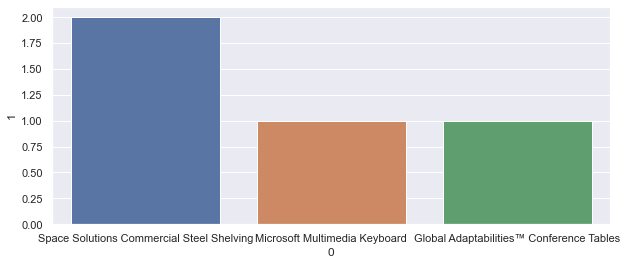

In [73]:
plt.figure(figsize=(10,4))
sns.barplot(x=val[0],y=val[1])